**Item Based Collaborative Filtering**

*Method 1(Using Indices and distances)*

In [32]:
#modules required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Mount the dataset from the drive
%cd '/content/drive/My Drive/Colab Notebooks/Amazon movies'

/content/drive/My Drive/Colab Notebooks/Amazon movies


In [34]:
#Display first 5 rows of the dataset
df = pd.read_csv('Amazon - Movies and TV Ratings.csv')
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,...,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#To set user_id as the index and remove auto generated indexes in the main df
df = df.set_index('user_id')
df.fillna(0,inplace=True)
df.head()


,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,Movie40,...,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#For better understanding,set rows to each unique movie name and columns to each unique user name
movies = df.T#transpose method to swap rows and columns
movies.head()

user_id,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,ANF0AGIV0JCH2,A3LDEBLV6MVUBE,A1R2XZWQ6NM5M1,A36L1XGA5AQIJY,A2HWI21H23GDS4,A1DNYFL3RSXRMO,A39VF226GBM1JH,ASB0E2O2FLNA7,A19E15Y9V09CVJ,A3K979KQ7K0S5K,A39ZX6X5H2N4TS,A2Z3ZHQI6YXKHH,A2RNKU9KJHQ2BV,A30WLYNJA3B17H,A3LI15T4YR5WD6,AV3UWBH6K0ETD,A312A70K5UUL1N,A23PSBNOBPLCOM,ATEOWCA0EHRQR,A2T8A34ZSAXGHA,A3G3WG4UMDSF8M,A3LHVMF6OJXJNM,A35ZSFP89PWC5B,ALQGU53I8TCU6,A1XU4NX76WRGZM,A1Z6CDRFVIHES5,AR6RBE9S8XZ8C,A2X0GJ1KR9B8U0,A1Z1NDXGCNMEST,A2GWNIH0RTOM67,...,A26D3NBYOIZRGE,A16OKS0HN6SL4S,A326Y8FFWXB1E7,A2IGMIAE0NR8M2,APKIZVAA35S8N,A1AJGEF2M3M8QA,A15KWS94WBQDIE,A2QS5LDQJ7JV0B,A3U3IT3S2GW8L1,A3LFPL2EDMMAN5,A1JYYFGPMHSEB6,A4LNTR1DZQXHC,A32OHAXPTGZ3ML,ARNOT3G5WS1ML,A3KPYTKXGKMUVF,AJX0YJBK0SWDR,A2E4OJWMR87W67,A39FHHGWESJIXE,AX7MXR0RLMX31,A1CHS5AQLXXDXJ,A2KT3M7HFAOSKR,A1M27P0B2QCOH8,A2G3QM6ZLT66HO,A2YSM4732ZHGZB,A1PT4GB3A675ZW,A23E3CUB03Z3YX,A1DQA0HJSSAD5A,A3FEZW3VTMKX15,A38BQZBXICC9C5,A27167LRSJEY1B,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
Movie1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie4,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie5,0.0,0.0,0.0,0.0,5.0,2.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,1.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,5.0,5.0,2.0,5.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#To group all the columns under one column name
movies.index.names=['Movie_name']
movies.head()

user_id,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,ANF0AGIV0JCH2,A3LDEBLV6MVUBE,A1R2XZWQ6NM5M1,A36L1XGA5AQIJY,A2HWI21H23GDS4,A1DNYFL3RSXRMO,A39VF226GBM1JH,ASB0E2O2FLNA7,A19E15Y9V09CVJ,A3K979KQ7K0S5K,A39ZX6X5H2N4TS,A2Z3ZHQI6YXKHH,A2RNKU9KJHQ2BV,A30WLYNJA3B17H,A3LI15T4YR5WD6,AV3UWBH6K0ETD,A312A70K5UUL1N,A23PSBNOBPLCOM,ATEOWCA0EHRQR,A2T8A34ZSAXGHA,A3G3WG4UMDSF8M,A3LHVMF6OJXJNM,A35ZSFP89PWC5B,ALQGU53I8TCU6,A1XU4NX76WRGZM,A1Z6CDRFVIHES5,AR6RBE9S8XZ8C,A2X0GJ1KR9B8U0,A1Z1NDXGCNMEST,A2GWNIH0RTOM67,...,A26D3NBYOIZRGE,A16OKS0HN6SL4S,A326Y8FFWXB1E7,A2IGMIAE0NR8M2,APKIZVAA35S8N,A1AJGEF2M3M8QA,A15KWS94WBQDIE,A2QS5LDQJ7JV0B,A3U3IT3S2GW8L1,A3LFPL2EDMMAN5,A1JYYFGPMHSEB6,A4LNTR1DZQXHC,A32OHAXPTGZ3ML,ARNOT3G5WS1ML,A3KPYTKXGKMUVF,AJX0YJBK0SWDR,A2E4OJWMR87W67,A39FHHGWESJIXE,AX7MXR0RLMX31,A1CHS5AQLXXDXJ,A2KT3M7HFAOSKR,A1M27P0B2QCOH8,A2G3QM6ZLT66HO,A2YSM4732ZHGZB,A1PT4GB3A675ZW,A23E3CUB03Z3YX,A1DQA0HJSSAD5A,A3FEZW3VTMKX15,A38BQZBXICC9C5,A27167LRSJEY1B,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
Movie_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie4,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie5,0.0,0.0,0.0,0.0,5.0,2.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,1.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,5.0,5.0,2.0,5.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.neighbors import NearestNeighbors

In [39]:
#The NearestNeighbors() in the sklearn.neighbors library is used to calculate the distance between movies using the cosine similarity and find the nearest neighbors for each movie.
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(movies.values)
distances, indices = knn.kneighbors(movies.values,n_neighbors=3)

In [40]:
print(indices)

[[  0   1   2]
 [  0   1   2]
 [  2   1   0]
 [  3   1   2]
 [  4   1   2]
 [  5   1   2]
 [  6   1   2]
 [  7   1   2]
 [  8   1   2]
 [  9   1   2]
 [ 10   1   2]
 [ 11  38   2]
 [ 12   1   2]
 [ 13 126   2]
 [ 14 102   2]
 [ 15 161  85]
 [ 16   1   2]
 [ 17   1   2]
 [ 18 126   2]
 [ 19 126   2]
 [ 20   1   2]
 [ 21   1   2]
 [ 22   1   2]
 [ 23   1   2]
 [ 24   1   2]
 [ 25   1   2]
 [ 26   1   2]
 [ 27   1   2]
 [ 28 126 139]
 [ 29   1   2]
 [ 30   1   2]
 [ 31   1   2]
 [ 32   1   2]
 [ 33   1   2]
 [ 34   1   2]
 [ 35  36  37]
 [ 35  36  37]
 [ 35  36  37]
 [ 38  11   2]
 [ 39   1   2]
 [ 40   1   2]
 [ 41   1   2]
 [ 42   1   2]
 [ 43 139   2]
 [ 44   1   2]
 [ 45   1   2]
 [ 46   1   2]
 [ 47   1   2]
 [ 48   1   2]
 [ 49   1   2]
 [ 50   1   2]
 [ 51   1   2]
 [ 52   1   2]
 [ 53  85   2]
 [ 54   1   2]
 [ 55   1   2]
 [ 56   1   2]
 [ 57   1   2]
 [ 58   1   2]
 [ 59   1   2]
 [ 60   1   2]
 [ 61   1   2]
 [ 62   1   2]
 [ 63   1   2]
 [ 64   1   2]
 [ 65   1   2]
 [ 66  68 

In [41]:
print(distances)

[[0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.22044605e-16 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.22044605e-16 1.00000000e+00 1.00000000e+00]
 [1.11022302e-16 7.76393202e-01 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 9.80881804e-01 1.00000000e+00]
 [0.00000000e+00 9.35206846e-01 1.00000000e+00]
 [0.00000000e+00 9.83923491e-01 9.91623034e-01]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 9.91124600e-01 1.00000000e+00]
 [0.00000000e+00 9.80881804e-01 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.000000

In [42]:
# get the index for 'Movie1'
index_for_movie = movies.index.tolist().index('Movie1')
# find the indices for the similar movies
sim_movies = indices[index_for_movie].tolist()
# distances between 'Movie1' and the similar movies
movie_distances = distances[index_for_movie].tolist()
# the position of 'Movie1' in the list sim_movies
id_movie = sim_movies.index(index_for_movie)
# remove 'Movie1' from the list sim_movies
sim_movies.remove(index_for_movie)
# remove 'Movie1' from the list movie_distances
movie_distances.pop(id_movie)
print('The Nearest Movies to Movie1:', sim_movies)
print('The Distance from Movie1:', movie_distances)

The Nearest Movies to Movie1: [1, 2]
The Distance from Movie1: [0.0, 1.0]


*Method 2(Using corrwith())*

In [43]:
df = pd.read_csv('Amazon - Movies and TV Ratings.csv')
df.fillna(0,inplace=True)
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,Movie11,Movie12,Movie13,Movie14,Movie15,Movie16,Movie17,Movie18,Movie19,Movie20,Movie21,Movie22,Movie23,Movie24,Movie25,Movie26,Movie27,Movie28,Movie29,Movie30,Movie31,Movie32,Movie33,Movie34,Movie35,Movie36,Movie37,Movie38,Movie39,...,Movie167,Movie168,Movie169,Movie170,Movie171,Movie172,Movie173,Movie174,Movie175,Movie176,Movie177,Movie178,Movie179,Movie180,Movie181,Movie182,Movie183,Movie184,Movie185,Movie186,Movie187,Movie188,Movie189,Movie190,Movie191,Movie192,Movie193,Movie194,Movie195,Movie196,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#To make a column into a row and to generate a new column with the value field
#The melted_df will only be used later to draw the graph
melted_df = df.melt(id_vars=['user_id'],var_name="Movie_name",value_name='Ratings')
melted_df.fillna(0,inplace=True)
melted_df = melted_df.set_index('user_id')
melted_df.head()


,Movie_name,Ratings
user_id,,
A3R5OBKS7OM2IR,Movie1,5.0
AH3QC2PC1VTGP,Movie1,0.0
A3LKP6WPMP9UKX,Movie1,0.0
AVIY68KEPQ5ZD,Movie1,0.0
A1CV1WROP5KTTW,Movie1,0.0


In [45]:
melted_df.groupby('Movie_name')['Ratings'].mean().sort_values(ascending=False).head()

Movie_name
Movie127    1.961840
Movie140    0.576320
Movie16     0.298267
Movie103    0.255982
Movie29     0.240924
Name: Ratings, dtype: float64

In [46]:
melted_df.groupby('Movie_name')['Ratings'].count().sort_values(ascending=False).head()

Movie_name
Movie99     4848
Movie157    4848
Movie166    4848
Movie165    4848
Movie164    4848
Name: Ratings, dtype: int64

In [47]:
plot_1 = pd.DataFrame(melted_df.groupby('Movie_name')['Ratings'].mean())
plot_1.head()

,Ratings
Movie_name,
Movie1,0.001031
Movie10,0.001031
Movie100,0.000825
Movie101,0.005157
Movie102,0.001650


In [48]:
plot_1['No. of ratings']=pd.DataFrame(melted_df.groupby('Movie_name')['Ratings'].count())
plot_1.head()

,Ratings,No. of ratings
Movie_name,,
Movie1,0.001031,4848
Movie10,0.001031,4848
Movie100,0.000825,4848
Movie101,0.005157,4848
Movie102,0.001650,4848


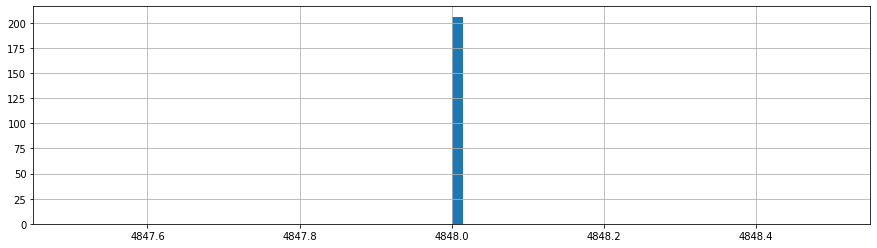

In [49]:
plt.figure(figsize=(15,4))
plot_1['No. of ratings'].hist(bins=70)

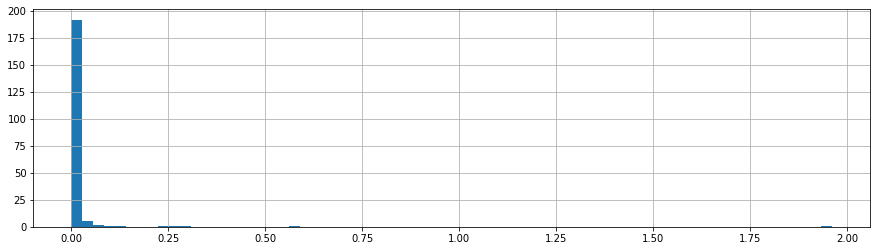

In [50]:
plt.figure(figsize=(15,4))
plot_1['Ratings'].hist(bins=70)

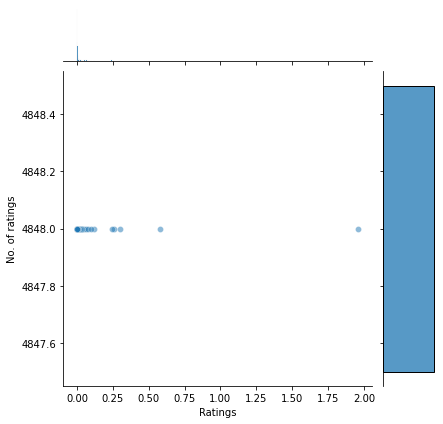

In [51]:
sns.jointplot(x='Ratings',y='No. of ratings',data=plot_1,alpha=0.5)


In [52]:
movie1_ratings = df['Movie1']
movie1_ratings.head()

0    5.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Movie1, dtype: float64

In [53]:
similar_to_movie1 = df.corrwith(movie1_ratings)

In [54]:
corr_movie1 = pd.DataFrame(similar_to_movie1,columns=['Correlation'])
corr_movie1.head()

,Correlation
Movie1,1.000000
Movie2,1.000000
Movie3,-0.000206
Movie4,-0.000292
Movie5,-0.001049


In [55]:
corr_movie1 = corr_movie1.join(plot_1['No. of ratings'])
corr_movie1.head()

,Correlation,No. of ratings
Movie1,1.000000,4848
Movie2,1.000000,4848
Movie3,-0.000206,4848
Movie4,-0.000292,4848
Movie5,-0.001049,4848


In [56]:
corr_movie1[corr_movie1['No. of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,No. of ratings
Movie1,1.000000,4848
Movie2,1.000000,4848
Movie171,-0.000206,4848
Movie100,-0.000206,4848
Movie144,-0.000206,4848


*Method 3 (Train and test without using scalar)-Not Funtional* 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


In [58]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
melted_df['Movie_name'] = labelencoder.fit_transform(melted_df['Movie_name'])
melted_df.tail()

,Movie_name,Ratings
user_id,,
A1IMQ9WMFYKWH5,119,5.0
A1KLIKPUF5E88I,119,5.0
A5HG6WFZLO10D,119,5.0
A3UU690TWXCG1X,119,5.0
AI4J762YI6S06,119,5.0


In [59]:
#split dataset
xx = melted_df.iloc[:,0]
X = xx.values.reshape(-1,1)
y = melted_df.iloc[:,1]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
# print(X.shape)
# print(y.shape)

In [60]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [61]:
classifier = KNeighborsClassifier(n_neighbors=3,algorithm='brute',metric='cosine')

In [62]:

classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [63]:
#predict the test set results
y_pred = classifier.predict(X_test)
y_pred

KeyboardInterrupt: ignored